In [54]:
import matplotlib.pyplot as plt
import itertools as itls
import math
import functools

№1

In [3]:

def draw_a_sequence_of_shapes(axis, sequence):
    for i in sequence:
        x, y = zip(*i)
        axis.plot(x + (x[0],), y + (y[0],), color = 'black')
    

№2

In [119]:

def gen_rectangle(space_in_between, stopping_point):
    count = 0
    while count != stopping_point: 
        yield ((0 + count + count * space_in_between + 0.5 * count, 0), (1.5 + count + count * space_in_between + 0.5 * count, 0), 
               (1.5 + count + count * space_in_between + 0.5 * count, 1), (0 + count + count * space_in_between + 0.5 * count, 1))
        count += 1

def gen_triangle(space_in_between, stopping_point):
    count = 0
    while count != stopping_point: 
        yield ((0 + count + count * space_in_between, 0), (1 + count + count * space_in_between, 0), 
               (0.5 + count + count * space_in_between, 1))
        count += 1

def gen_hexagon(space_in_between, stopping_point):
    count = 0
    while count != stopping_point:
        yield ((0 + count + count * space_in_between, 0.25), (0.5 + count + count * space_in_between, 0), 
               (1 + count + count * space_in_between, 0.25), (1 + count + count * space_in_between, 0.75),
                 (0.5 + count + count * space_in_between, 1), (0 + count + count * space_in_between, 0.75))
        count += 1



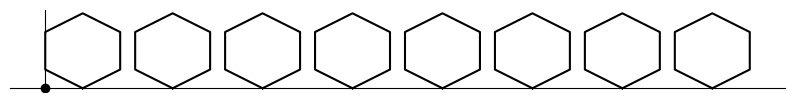

In [68]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(0, 0, color = 'black')

draw_a_sequence_of_shapes(ax, gen_hexagon(0.2, 8))

ax.set_aspect('equal')
plt.show()

№3

In [259]:

def get_directional_vector(angle):
    return (math.cos(math.radians(angle)), math.sin(math.radians(angle)))

In [88]:

def tr_translate(polygon, direction, distance):
    translated_poly = []
    for vertice in polygon:
        translated_poly.append((vertice[0] + (direction[0] * distance), vertice[1] + (direction[1] * distance)))
    return tuple(translated_poly)


In [146]:

def tr_rotate(polygon, angle):
    rotated_poly = []
    for vertice in polygon:
        rotated_poly.append((vertice[0] * math.cos(math.radians(angle)) - vertice[1] * math.sin(math.radians(angle)), 
                             vertice[0] * math.sin(math.radians(angle)) + vertice[1] * math.cos(math.radians(angle))))
    return rotated_poly


In [149]:

def tr_symmetry(polygon):
    v_symmetrical_poly = []
    for vertice in polygon:
        v_symmetrical_poly.append((vertice[0], vertice[1] + max([i[1] for i in polygon]) * 2 - vertice[1] * 2))
    return v_symmetrical_poly


In [222]:

def tr_homothety(polygon, origin, k):
    homo_poly = []
    for vertice in polygon:
        homo_poly.append(map(lambda g, h : g + h, origin, [i * k for i in map(lambda x, y: x - y, vertice, origin)]))
    return homo_poly


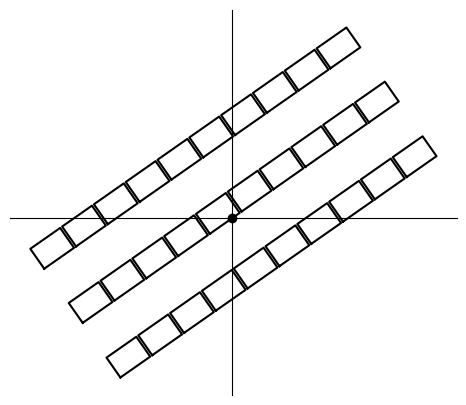

In [235]:
fig1, ax1 = plt.subplots(figsize = (10, 5))

ax1.spines['left'].set_position('zero')
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.scatter(0, 0, color = 'black')

draw_a_sequence_of_shapes(ax1, map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(200), distance = 8), gen_rectangle(0.1, 10))))
draw_a_sequence_of_shapes(ax1, map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(180), distance = 7.5), gen_rectangle(0.1, 10))))
draw_a_sequence_of_shapes(ax1, map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(160), distance = 8), gen_rectangle(0.1, 10))))

ax1.set_aspect('equal')
plt.show()

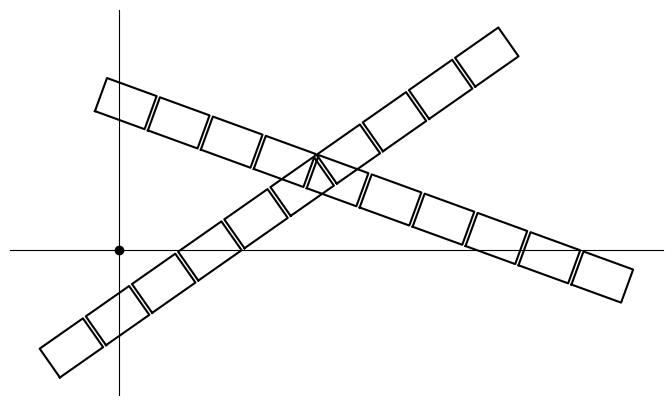

In [244]:
fig2, ax2 = plt.subplots(figsize = (10, 5))

ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.scatter(0, 0, color = 'black')

draw_a_sequence_of_shapes(ax2, map(functools.partial(tr_rotate, angle = -20), map(functools.partial(tr_translate, direction = get_directional_vector(120), distance = 4), gen_rectangle(0.1, 10))))
draw_a_sequence_of_shapes(ax2, map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(210), distance = 4), gen_rectangle(0.1, 10))))

ax2.set_aspect('equal')
plt.show()

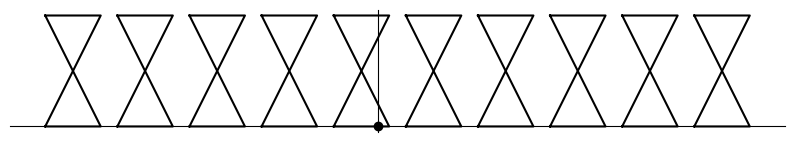

In [248]:
fig3, ax3 = plt.subplots(figsize = (10, 5))

ax3.spines['left'].set_position('zero')
ax3.spines['bottom'].set_position('zero')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.scatter(0, 0, color = 'black')

draw_a_sequence_of_shapes(ax3, map(functools.partial(tr_translate, direction = get_directional_vector(180), distance = 6), map(tr_symmetry, gen_triangle(0.3, 10))))
draw_a_sequence_of_shapes(ax3, map(functools.partial(tr_translate, direction = get_directional_vector(180), distance = 6), gen_triangle(0.3, 10)))


ax3.set_aspect('equal')
plt.show()

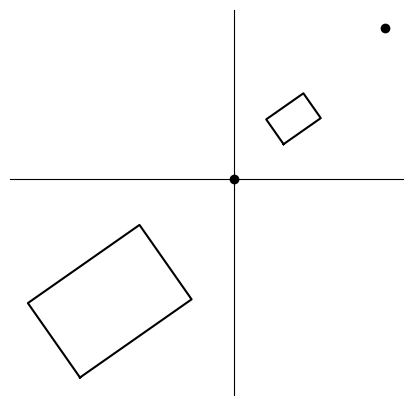

In [258]:
fig4, ax4 = plt.subplots(figsize = (10, 5))

ax4.spines['left'].set_position('zero')
ax4.spines['bottom'].set_position('zero')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xticks([])
ax4.set_yticks([])
ax4.scatter(0, 0, color = 'black')
ax4.scatter(5, 5, color = 'black')

draw_a_sequence_of_shapes(ax4, map(functools.partial(tr_homothety, origin = (5, 5), k = 3), map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(0), distance = 2), gen_rectangle(0.1, 1)))))
draw_a_sequence_of_shapes(ax4, map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(0), distance = 2), gen_rectangle(0.1, 1))))

ax4.set_aspect('equal')
plt.show()